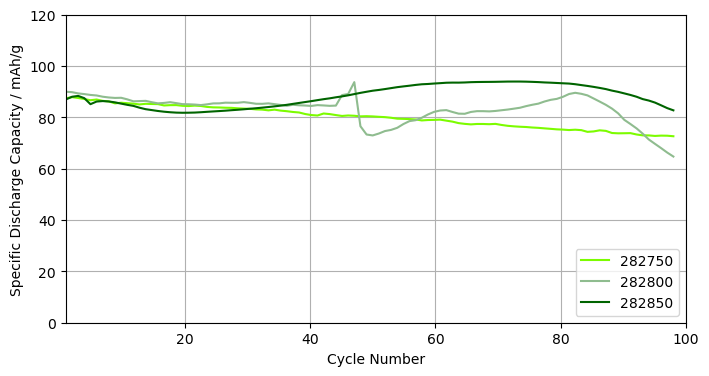

In [40]:
#Simple plots of GCD curves for equivalent compositions at differing synthesis temperatures.
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.interpolate import interp1d
import numpy as np

excel_files = [
    '/Users/harryfyjis-walker/Desktop/Part II Stuff/Electrochem Data for analaysis/HFW_GCD_NFMMO_282750_1.5-4.3_MB1.47_NEWARE_COPYDATA.xlsx',
    '/Users/harryfyjis-walker/Desktop/Part II Stuff/Electrochem Data for analaysis/HFW_GCD_NFMMO_282800_1.5-4.3_MB1.50_NEWARE_COPYDATA.xlsx',
    '/Users/harryfyjis-walker/Desktop/Part II Stuff/Electrochem Data for analaysis/HFW_GCD_NFMMO_282850_3_1.5-4.3_C06_BIOLOGIC_MB1.47_FINISHED_EXCEL.xlsx',
    #'/Users/harryfyjis-walker/Desktop/Part II Stuff/Electrochem Data for analaysis/HFW_RATE_552750-REDO-2_2401024_1.5-4.3_NEWARE_COPYDATA.xlsx',
    #'/Users/harryfyjis-walker/Desktop/Part II Stuff/Electrochem Data for analaysis/HFW_GCD_552800-REDO-2-240124_1.5-4.3_NEWARE_MB1.51_COPYDATA.xlsx',
    #'/Users/harryfyjis-walker/Desktop/Part II Stuff/Electrochem Data for analaysis/HFW_GCD_552850-REDO-1_1.5-4.3_MB1.49_NEWARE_COPYDATA.xlsx',
]

all_x_values = []
all_y_values = []
file_labels = []

for excel_file in excel_files:
    numbers = re.findall(r'\d{6}', excel_file)
    if numbers:
        label = numbers[0] 
        file_labels.append(label)
    else:
        file_labels.append("Unknown")

    df = pd.read_excel(excel_file)
    
    x_values = []
    y_values = []

    for col in df.columns:
        if 'Col' in col and int(col.split('Col')[-1]) % 2 != 0:
            non_zero_values = df[col][(df[col] != 0) & (~df[col].isnull())]
            if not non_zero_values.empty:
                final_value = non_zero_values.iloc[-1]
                cycle_number = (int(col.split('Col')[-1]) + 1) / 2
                if cycle_number <= 98: 
                    x_values.append(final_value)
                    y_values.append(cycle_number)
    
    all_x_values.append(x_values)
    all_y_values.append(y_values)

interpolated_curves = []
for i in range(len(excel_files)):
    f = interp1d(all_y_values[i], all_x_values[i], kind='cubic')
    x_new = np.linspace(min(all_y_values[i]), 98, 100) 
    y_new = f(x_new)
    interpolated_curves.append((x_new, y_new))

colors = ['lawngreen', 'darkseagreen', 'darkgreen']

plt.figure(figsize=(8,4))

for i in range(len(interpolated_curves)):
    x_new, y_new = interpolated_curves[i]
    plt.plot(x_new, y_new, color=colors[i], label=file_labels[i])

plt.xlabel('Cycle Number')
plt.ylabel('Specific Discharge Capacity / mAh/g')

plt.legend(loc='lower right')

plt.ylim(0, 120)
plt.xlim(1, 100)

plt.grid(True)

output_file = "/Users/harryfyjis-walker/Desktop/Part II Stuff/figures/2CapacityCycleNumber282Series.pdf"
plt.savefig(output_file, format='pdf')

plt.show()
